In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree

In [2]:
data = pd.read_csv("Titanic.csv")
data.head()

,Passengerid,Age,Fare,Sex,sibsp,Parch,Pclass,Embarked,survived
0,1,22.0,7.2500,0,1,0,3,2.0,0
1,2,38.0,71.2833,1,1,0,1,0.0,1
2,3,26.0,7.9250,1,0,0,3,2.0,1
3,4,35.0,53.1000,1,1,0,1,2.0,1
4,5,35.0,8.0500,0,0,0,3,2.0,0


In [3]:
data.isnull().sum()

Passengerid    0
Age            0
Fare           0
Sex            0
sibsp          0
Parch          0
Pclass         0
Embarked       2
survived       0
dtype: int64

In [4]:
data.Embarked.fillna(method = 'pad' , inplace = True)

In [5]:
data.drop(columns=["Passengerid"] , inplace = True)

In [6]:
data.head()

,Age,Fare,Sex,sibsp,Parch,Pclass,Embarked,survived
0,22.0,7.2500,0,1,0,3,2.0,0
1,38.0,71.2833,1,1,0,1,0.0,1
2,26.0,7.9250,1,0,0,3,2.0,1
3,35.0,53.1000,1,1,0,1,2.0,1
4,35.0,8.0500,0,0,0,3,2.0,0


In [7]:
print(data.Age.dtype , data.Fare.dtype , data.Sex.dtype , data.sibsp.dtype , 
data.Parch.dtype , data.Pclass.dtype , data.Embarked.dtype , data.survived.dtype)

float64 float64 int64 int64 int64 int64 float64 int64


In [8]:
X = data.iloc[:,1:8]
Y = data.Age

In [9]:
X.head()

,Fare,Sex,sibsp,Parch,Pclass,Embarked,survived
0,7.2500,0,1,0,3,2.0,0
1,71.2833,1,1,0,1,0.0,1
2,7.9250,1,0,0,3,2.0,1
3,53.1000,1,1,0,1,2.0,1
4,8.0500,0,0,0,3,2.0,0


In [10]:
x_train , x_test , y_train , y_test = train_test_split(X , Y ,test_size = .2 , random_state= 10)

In [11]:
print(x_train.shape , x_test.shape , y_train.shape , y_test.shape)

(1047, 7) (262, 7) (1047,) (262,)


In [12]:
model = DecisionTreeRegressor(criterion='mse',splitter='best',max_depth=3 , random_state=10)

In [13]:
model.fit(x_train , y_train)

DecisionTreeRegressor(max_depth=3, random_state=10)

In [14]:
model.score(x_test , y_test)

0.22399536413076104

In [15]:
model.score(x_train , y_train)

0.2779108402425996

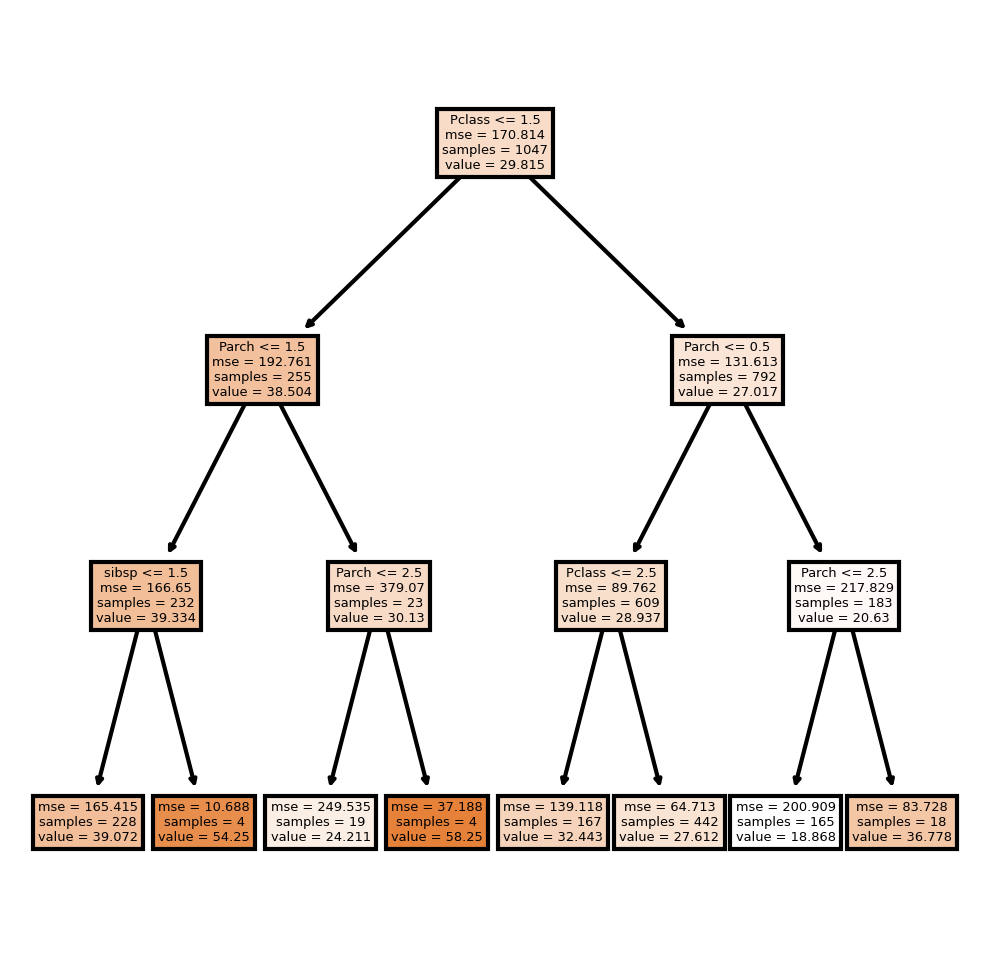

In [16]:
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)

tree.plot_tree(model,
           feature_names = x_train.columns, 
           filled = True);
# Saving your plot if you want
fig.savefig('Image.jpg')